# Unsupervised Learning on Country Data
## Data Science Tutorial
Danylo Voloshyn, Andreas Payer
### Introduction

The purpose of this tutorial is to take you through the data science pipeline, from data collection to insight. We will be working with data about countries, their population, health, and economic data. We would like to cluster them to find out which properties are correlated and how countries can be grouped. This can reveal previously unknown similarities between countries and help us solve problems that they face using correlated properties ([features](https://en.wikipedia.org/wiki/Feature_(machine_learning))). For instance, countries that have a low life expectancy may also have low health expenditures, so we might look to that as a solution. 

Then, we will group countries by these metrics using [Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis). This may reveal interesting groupings of countries and help us understand how their features came to be. In particular, many countries in geographic proximity to each other have similar features by observation, so their continent or larger landmass (such as Afro-Eurasia or The Americas) may play a role in these properties. We would like to see if this is true.

We will be using the datasets found here - please download the CSV files and put them in the same directory as your code file: \
[Unsupervised Learning on Country Data](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data) \
[Population by Country - 2020](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data)

### Data Collection

First, we will read the datasets from the CSV (Comma-Separated Values) files and load them into pandas DataFrames. Data collection can also be done using [web scraping](https://en.wikipedia.org/wiki/Web_scraping), [databases](https://en.wikipedia.org/wiki/Database), and other methods, but CSV files are common, especially on data science websites like [Kaggle](https://kaggle.com/) and [Data.world](https://data.world/). CSV files contain text separated by commas and newline characters, and you should be able to read it by opening it in your editor. This makes the data collection process very simple as well.

Pandas is a powerful data manipulation library that provides data structures and functions to work with structured data.

In [123]:
import pandas as pd

df1 = pd.read_csv('Country-data.csv')
df2 = pd.read_csv('population_by_country_2020.csv')

### Data Processing

We want to combine the datasets and doing a simple inner join is sufficient because it yields plenty of countries (over 100) to examine. Performing an outer join would result in NaN values which would complicate later analysis and modeling, and because of the quantity of data we have, we find it reasonable to discard countries with missing data. However, we find that some countries are listed under slightly different names in the two datasets, so we will rename them to prevent misses when performing the inner join.

In [124]:
missing = {'St. Vincent and the Grenadines': 'St. Vincent & Grenadines', 
           'Macedonia, FYR': 'North Macedonia',
           'Kyrgyz Republic': 'Kyrgyzstan',
           'Congo, Dem. Rep.': 'DR Congo',
           'Slovak Republic': 'Slovakia',
           'Cape Verde': 'Cabo Verde',
           'Lao': 'Laos',
           'Cote d\'Ivoire': 'Côte d\'Ivoire', 
           'Micronesia, Fed. Sts.': 'Micronesia', 
           'Congo, Rep.': 'Congo', 
           'Czech Republic': 'Czech Republic (Czechia)'}

for k in missing:
    df1.loc[df1['country'] == k, 'country'] = missing[k]

df = df1.merge(df2, left_on='country', right_on='Country (or dependency)')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,...,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,...,39074280,2.33 %,886592,60,652860,-62920.0,4.6,18,25 %,0.50 %
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,...,2877239,-0.11 %,-3120,105,27400,-14000.0,1.6,36,63 %,0.04 %
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,...,43984569,1.85 %,797990,18,2381740,-10000.0,3.1,29,73 %,0.56 %
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,...,33032075,3.27 %,1040977,26,1246700,6413.0,5.6,17,67 %,0.42 %
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,...,98069,0.84 %,811,223,440,0.0,2.0,34,26 %,0.00 %
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,...,308337,2.42 %,7263,25,12190,120.0,3.8,21,24 %,0.00 %
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,...,28421581,-0.28 %,-79889,32,882050,-653249.0,2.3,30,N.A.,0.36 %
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,...,97490013,0.91 %,876473,314,310070,-80000.0,2.1,32,38 %,1.25 %
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,...,29935468,2.28 %,664042,56,527970,-30000.0,3.8,20,38 %,0.38 %


We now have inconsistency in the column names, as well as redundant columns, so we will rename the columns appropriately and drop the unnecessary ones. The redundant columns are 'Fert. Rate' and 'Country (or dependency)' because they are present in the other dataset and 'Net Change' because we already have the percent change in population, which is more appropriate as it accounts for population. Then, we drop the 3 rows containing missing values for the urban population feature. We then clean up the data by removing percentage signs and converting all values to numbers that can be processed easily. We also divide the total migrant data by the population for that country to get a population-adjusted migrant rate, which is more appropriate here and allows to better see relationships with migration.

In [125]:
# drop unnecessary columns
df.drop(columns=['Fert. Rate', 'Country (or dependency)',
        'Net Change'], inplace=True)

# change inconsistent column names
df = df.rename(columns={'health': 'health_spend',
                        'inflation': 'gdp_grow',
                        'total_fer': 'fert',
                        'gdpp': 'gdp_percapita',
                        'Population (2020)': 'population',
                        'Yearly Change': 'pop_grow',
                        'Density (P/Km²)': 'pop_density',
                        'Land Area (Km²)': 'land_area',
                        'Migrants (net)': 'migrants',
                        'Med. Age': 'med_age',
                        'Urban Pop %': 'urban_pop',
                        'World Share': 'world_share'})

# remove countries with missing values
df = df.replace('N.A.', pd.NA)
print("Missing values by feature:\n")
print(df.isna().sum())
df.dropna(inplace=True)

# fix the index after dropping rows
df.index = range(df.index.size)

# remove percentage signs
df['pop_grow'] = df['pop_grow'].str[:-2]
df['urban_pop'] = df['urban_pop'].str[:-2]
df['world_share'] = df['world_share'].str[:-2]

# adjust migrant data
df['migrants'] /= (df['population'] / 100)

# make all values (except country name) numeric for processing
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
df

Missing values by feature:

country          0
child_mort       0
exports          0
health_spend     0
imports          0
income           0
gdp_grow         0
life_expec       0
fert             0
gdp_percapita    0
population       0
pop_grow         0
pop_density      0
land_area        0
migrants         0
med_age          0
urban_pop        3
world_share      0
dtype: int64


,country,child_mort,exports,health_spend,imports,income,gdp_grow,life_expec,fert,gdp_percapita,population,pop_grow,pop_density,land_area,migrants,med_age,urban_pop,world_share
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,39074280,2.33,60,652860,-0.161027,18,25,0.5
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2877239,-0.11,105,27400,-0.486578,36,63,0.04
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,43984569,1.85,18,2381740,-0.022735,29,73,0.56
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,33032075,3.27,26,1246700,0.019414,17,67,0.42
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,98069,0.84,223,440,0.000000,34,26,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,33551824,1.48,79,425400,-0.026416,28,50,0.43
160,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,308337,2.42,25,12190,0.038918,21,24,0.0
161,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,97490013,0.91,314,310070,-0.082060,32,38,1.25
162,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,29935468,2.28,56,527970,-0.100216,20,38,0.38


### Exploratory Data Analysis & Visualization

We will create sorted plots of the features are created to help with understanding the feature distributions. Matplotlib is a popular graphical library, and we will use its pyplot interface to create the plots easily. We will use a [0-1 color picker](https://rgbcolorpicker.com/0-1) to pick the colors for the plots, and feel free to change them to your liking.

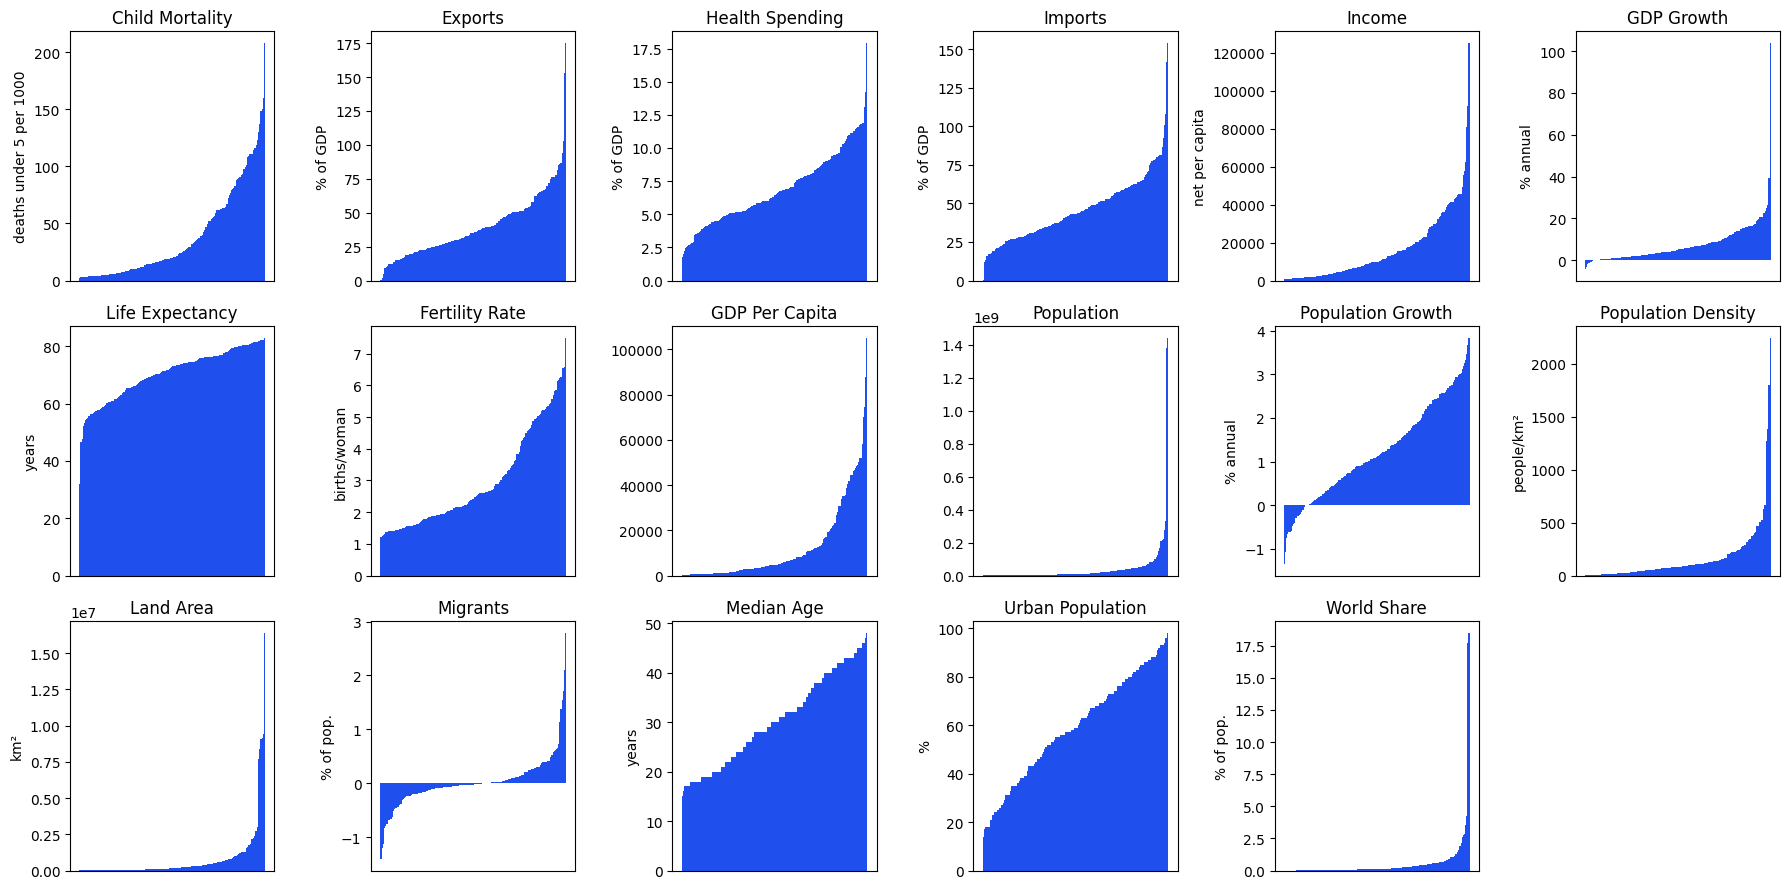

In [126]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 6, figsize=(18, 9))

# define units for the y-axis
titles = ['Child Mortality', 'Exports', 'Health Spending', 'Imports', 
          'Income', 'GDP Growth', 'Life Expectancy', 'Fertility Rate', 
          'GDP Per Capita', 'Population', 'Population Growth', 'Population Density', 
          'Land Area', 'Migrants', 'Median Age', 'Urban Population', 'World Share']
units = ['deaths under 5 per 1000', '% of GDP', '% of GDP', '% of GDP', 
         'net per capita', '% annual', 'years', 'births/woman', '', '', 
         '% annual', 'people/km²', 'km²', '% of pop.', 'years', '%', '% of pop.']

for i, col in enumerate(df.drop(columns='country', inplace=False).columns):
  # select the location and plot there
  plt.sca(ax.flatten()[i])
  plt.bar(df.index, df[col].sort_values(ascending=True), width=1, color=(0.122, 0.31, 0.929))
  plt.title(titles[i])
  plt.ylabel(units[i])
  
  # remove bottom labels as they don't help us here
  plt.tick_params(bottom = False, labelbottom=False)

# remove the last plot since we don't use it
plt.sca(ax.flatten()[-1])
plt.axis('off')

plt.tight_layout()
plt.show()


The distribution of various country metrics displays distinct patterns. Child mortality, exports, health spending, imports, income, GDP per capita, population, population growth, population density, land area, migrants, and world share all exhibit right-skewed distributions. This indicates that most countries have lower values for these metrics, with a few outliers possessing significantly higher values. For instance, most countries have low child mortality rates, small export percentages, and low health spending relative to their GDP, while only a few countries show extremely high values in these areas. Conversely, life expectancy and urban population are left-skewed, with most countries having high values in these metrics, such as high life expectancies and large percentages of urban population. Fertility rate and median age show somewhat unique patterns, with the fertility rate being right-skewed, indicating that most countries have low fertility rates, and median age showing a more balanced distribution, with most countries falling in a middle range. GDP growth and population growth display right-skewed distributions but with notable concentrations around lower values. This suggests that while most countries experience low to moderate growth rates, a few outliers exhibit very high growth. Migrants have a distribution centered around zero, indicating low net migration numbers for most countries, with some experiencing significant migration inflows or outflows.

Overall, the data highlights that most countries tend to cluster at lower values for many metrics, with fewer countries acting as outliers with much higher values, except for metrics like life expectancy and urban population where higher values are more common.

Now, we will plot the frequency distribution of each feature.

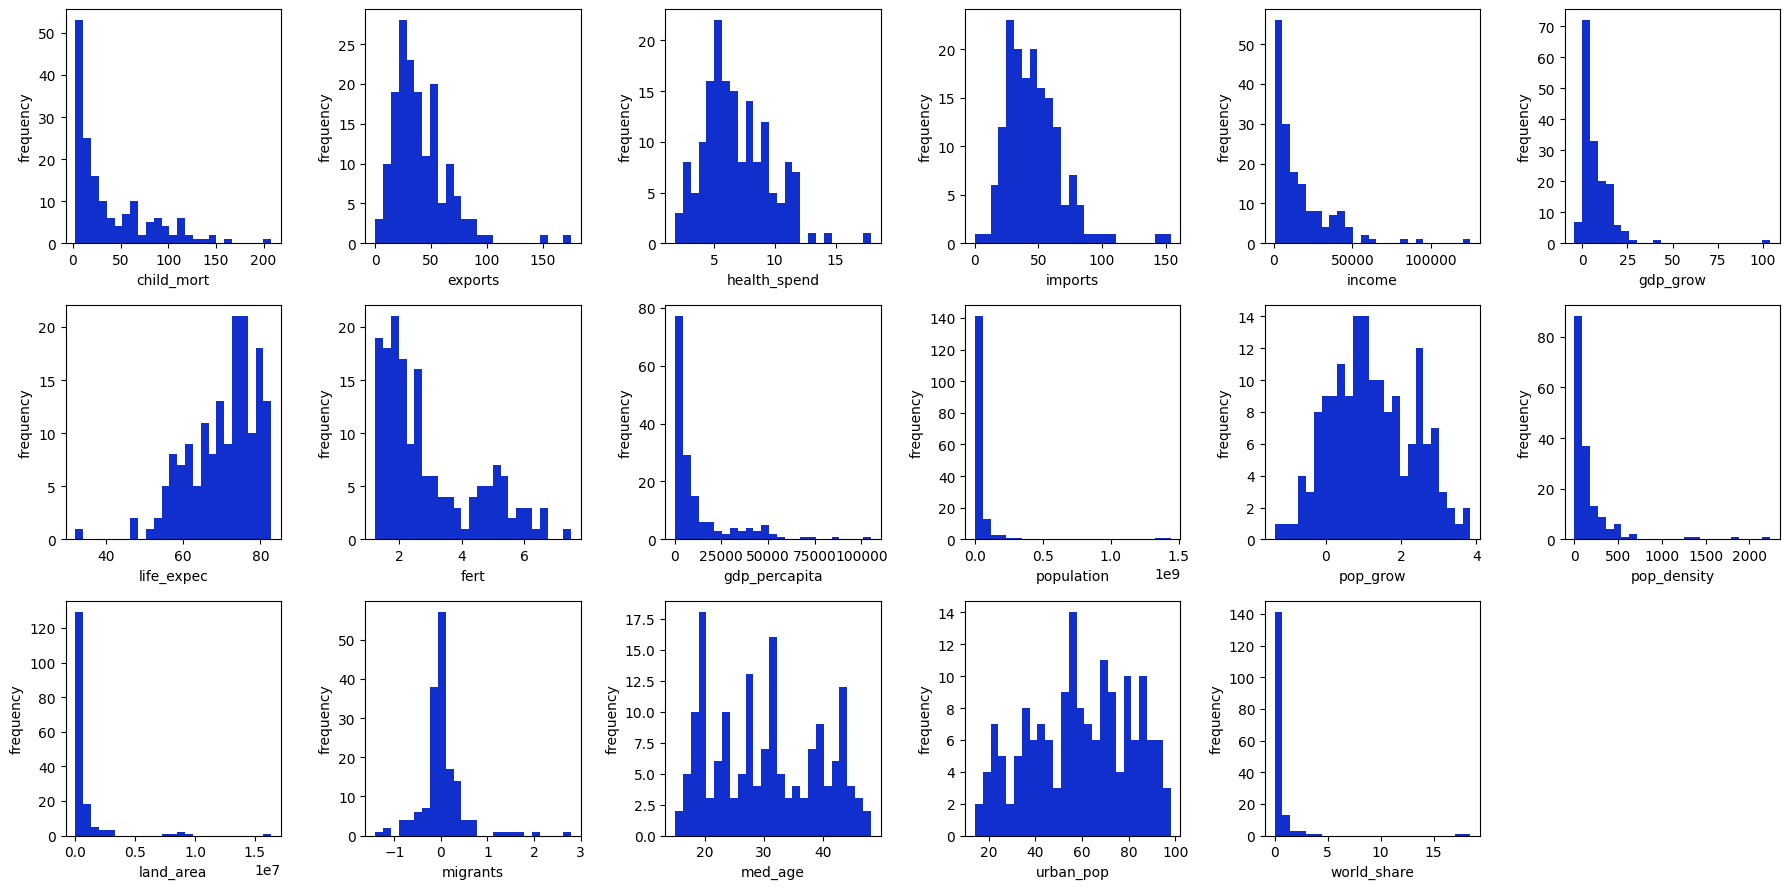

In [127]:
# do the same as above but plot the distributions
fig, ax = plt.subplots(3, 6, figsize=(18, 9))

for i, col in enumerate(df.drop(columns='country', inplace=False).columns):
  plt.sca(ax.flatten()[i])
  plt.hist(df[col], bins=25, color=(0.063, 0.184, 0.8))
  plt.xlabel(col)
  plt.ylabel('frequency')

plt.sca(ax.flatten()[-1])
plt.axis('off')

plt.tight_layout()
plt.show()

We can see that the densities of some features follow a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution), where the values reside near an average, called the mean. For instance, population growth and imports have this distribution, which appears often in data. Others are left-skewed or more like an [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution), where the lowest values, often near zero, are the most common. Features such as child mortality and population seem to have this distribution. Some other features seem to be randomly distributed, like median age and urban population.

We will now create pair plots between the economic features to help with understanding the relationships among these statistics. We will use the seaborn library to create scatter plots of the features against each other. Seaborn is a powerful visualization library that can create complex plots with very little code. This will help us understand the relationships between the features. The [main diagonal](https://en.wikipedia.org/wiki/Main_diagonal) of the pair plot will show the distribution of each property, as above, providing context for that property. Each scatter plot will have a line of best fit because of the `kind='reg'` parameter, helping us see each correlation.

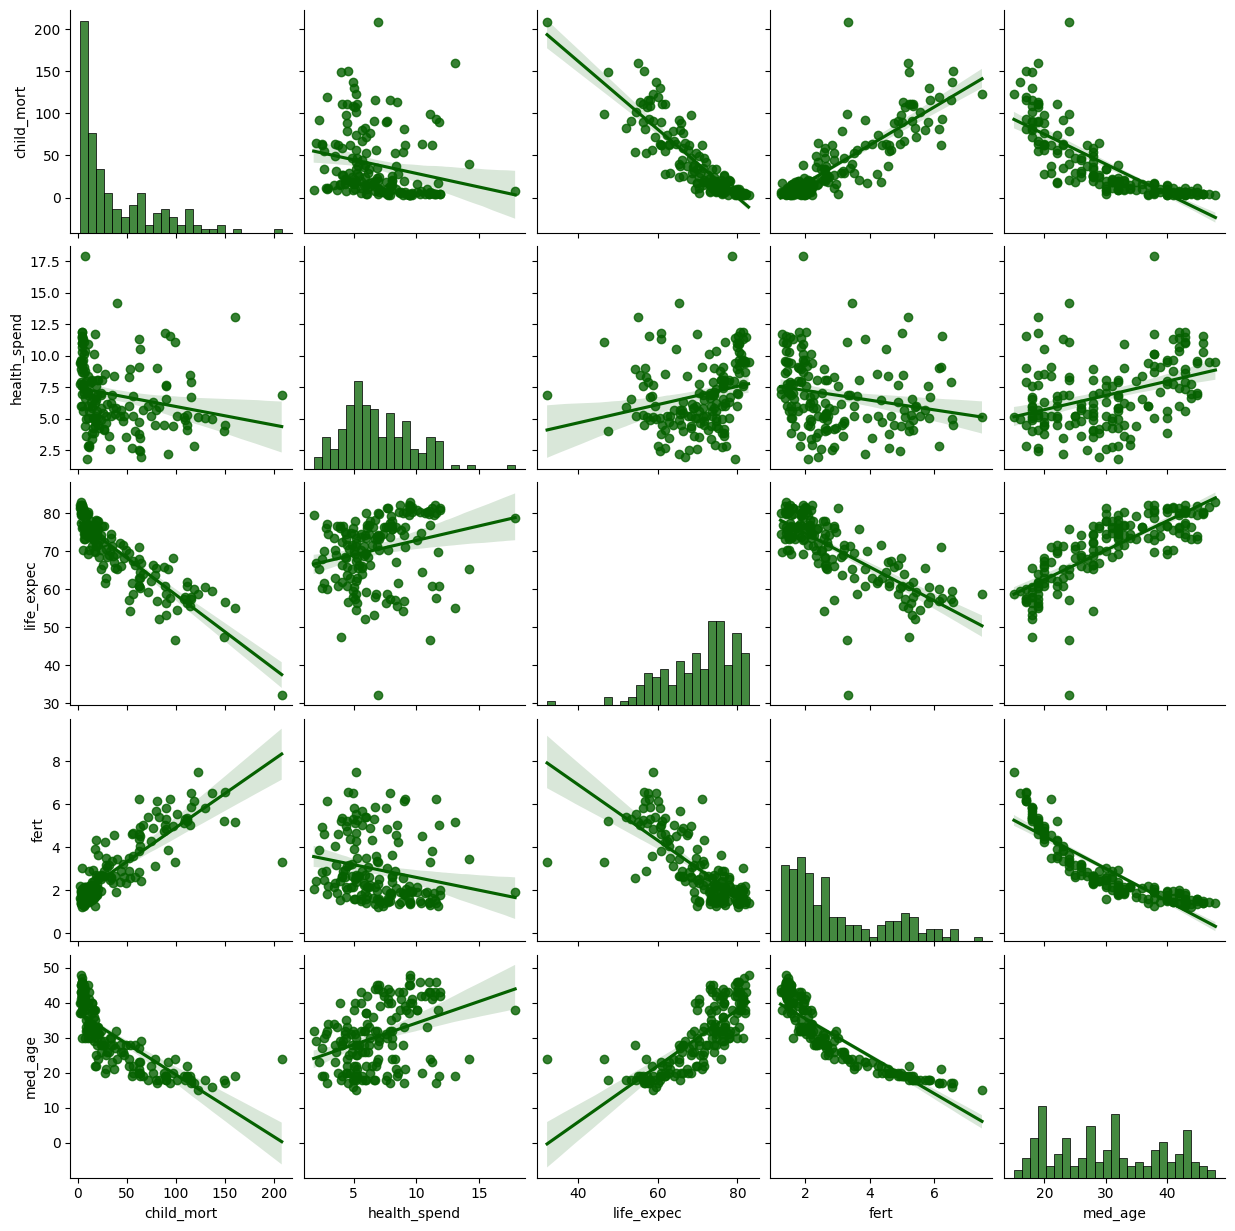

In [128]:
import seaborn as sns

temp = df[['child_mort', 'health_spend', 'life_expec', 'fert', 'med_age']].apply(pd.to_numeric)
green = (0.02, 0.38, 0)
lightgreen = (0.02, 0.38, 0, 0.151)

sns.pairplot(temp, kind='reg', plot_kws={'color': green, 'line_kws': {
             'color': green}, 'scatter_kws': {'color': lightgreen}}, 
             diag_kws={'color': lightgreen, 'bins': 25})
plt.show()

These scatter plots reveal various relationships between economic features. There is a moderate positive correlation between imports and exports, indicating that countries with higher exports tend to import more. A similar, albeit weaker, trend is observed between imports and income, and imports and GDP per capita, suggesting that higher income countries and those with higher GDP per capita tend to import more. However, there is no significant relationship between imports and GDP growth, as the data points are widely scattered. Exports also show a moderate positive correlation with income and GDP per capita, with higher income countries and those with higher GDP per capita tending to export more. Similar to imports, there is no significant relationship between exports and GDP growth. Income and GDP per capita display a strong positive correlation, where higher income countries generally have higher GDP per capita. This relationship is more pronounced at lower income levels and becomes less linear at higher income levels. On the other hand, GDP growth shows no clear trend with imports, exports, income, or GDP per capita, indicating no straightforward relationship with these features.

In summary, while imports, exports, and income have moderate to strong correlations with each other and with GDP per capita, GDP growth does not exhibit clear relationships with the other economic features.

We will also create pair plots between the health features to help with understanding the relationships among these statistics.

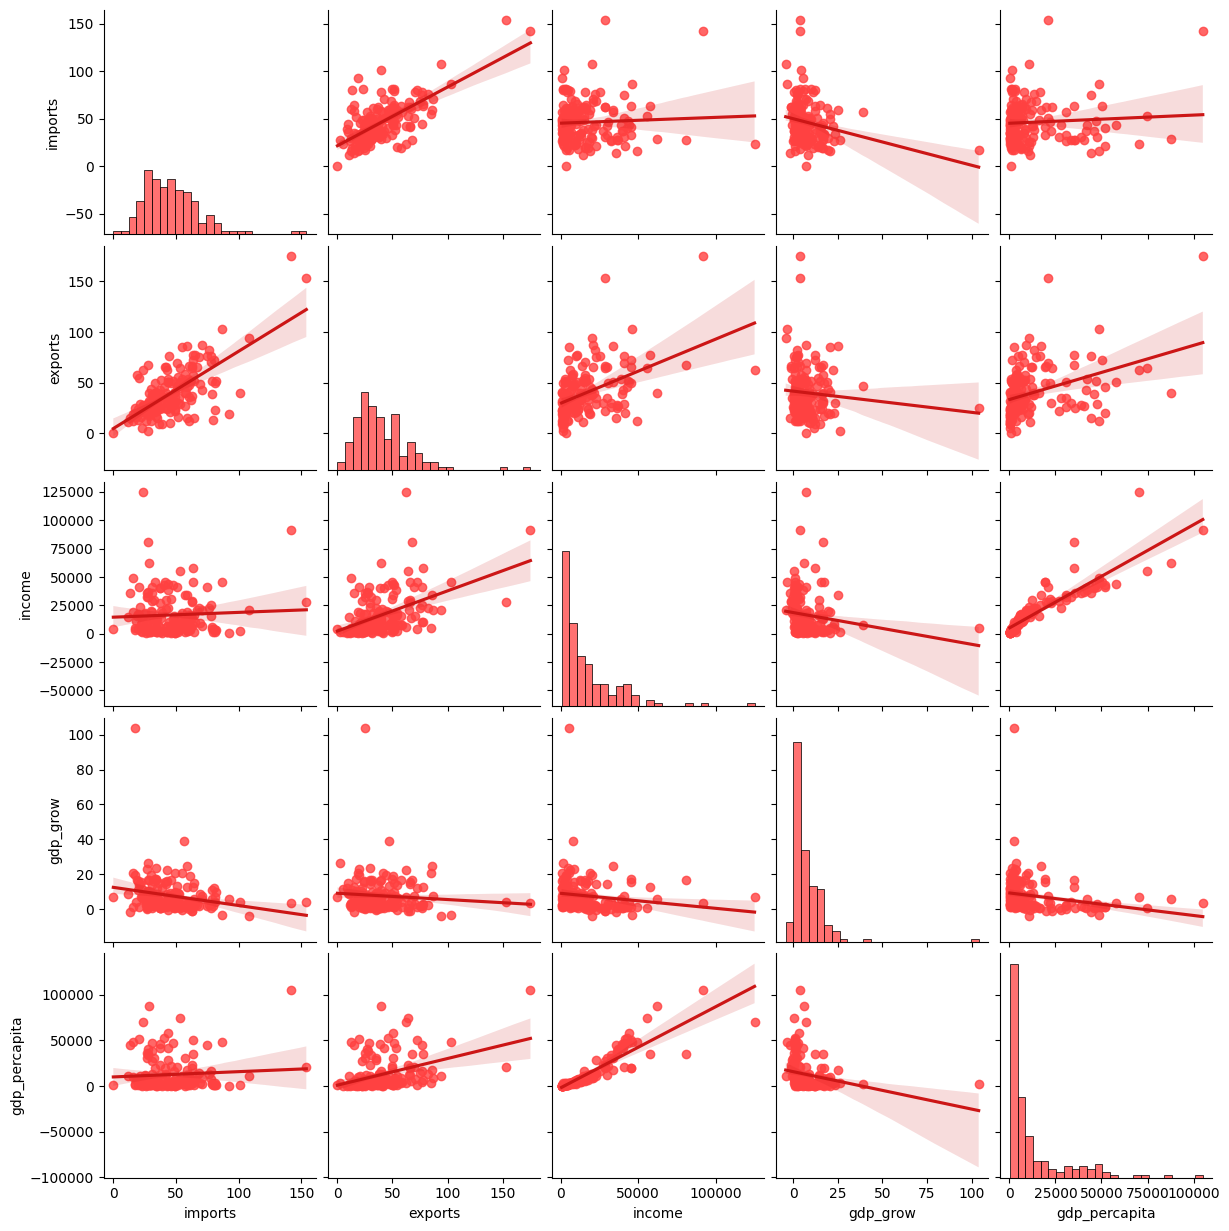

In [129]:
temp = df[['imports', 'exports', 'income', 'gdp_grow', 'gdp_percapita']].apply(pd.to_numeric)
red = (0.8, 0.086, 0.086)
lightred = (1, 0.255, 0.255, 0.42)

sns.pairplot(temp, kind='reg', plot_kws={'color': red, 'line_kws': {
             'color': red}, 'scatter_kws': {'color': lightred}}, 
             diag_kws={'color': lightred, 'bins': 25})
plt.show()

These scatter plots reveal several key relationships between health features. There is a strong negative correlation between child mortality and life expectancy, indicating that higher child mortality rates are associated with lower life expectancies. Similarly, higher child mortality rates are linked to higher fertility rates and lower median ages, showing moderate and strong negative correlations, respectively. Health spending shows a weak positive trend with both life expectancy and median age, suggesting that higher health spending is generally associated with better health outcomes and older populations, though the correlations are not strong. There is no significant relationship between health spending and fertility rates. Life expectancy and fertility rates display a strong negative correlation, where higher life expectancies are associated with lower fertility rates. Additionally, there is a strong positive correlation between life expectancy and median age, indicating that countries with higher life expectancies tend to have older populations. Lastly, the fertility rate and median age exhibit a strong negative correlation, suggesting that higher fertility rates are found in countries with younger populations.

Overall, the data reveal that child mortality, life expectancy, fertility rates, and median age are strongly interrelated, whereas health spending shows weaker associations with these features.

We will also create pair plots between the population features to help with understanding the relationships among these statistics. We will not include population or land area because population density is a function of those.

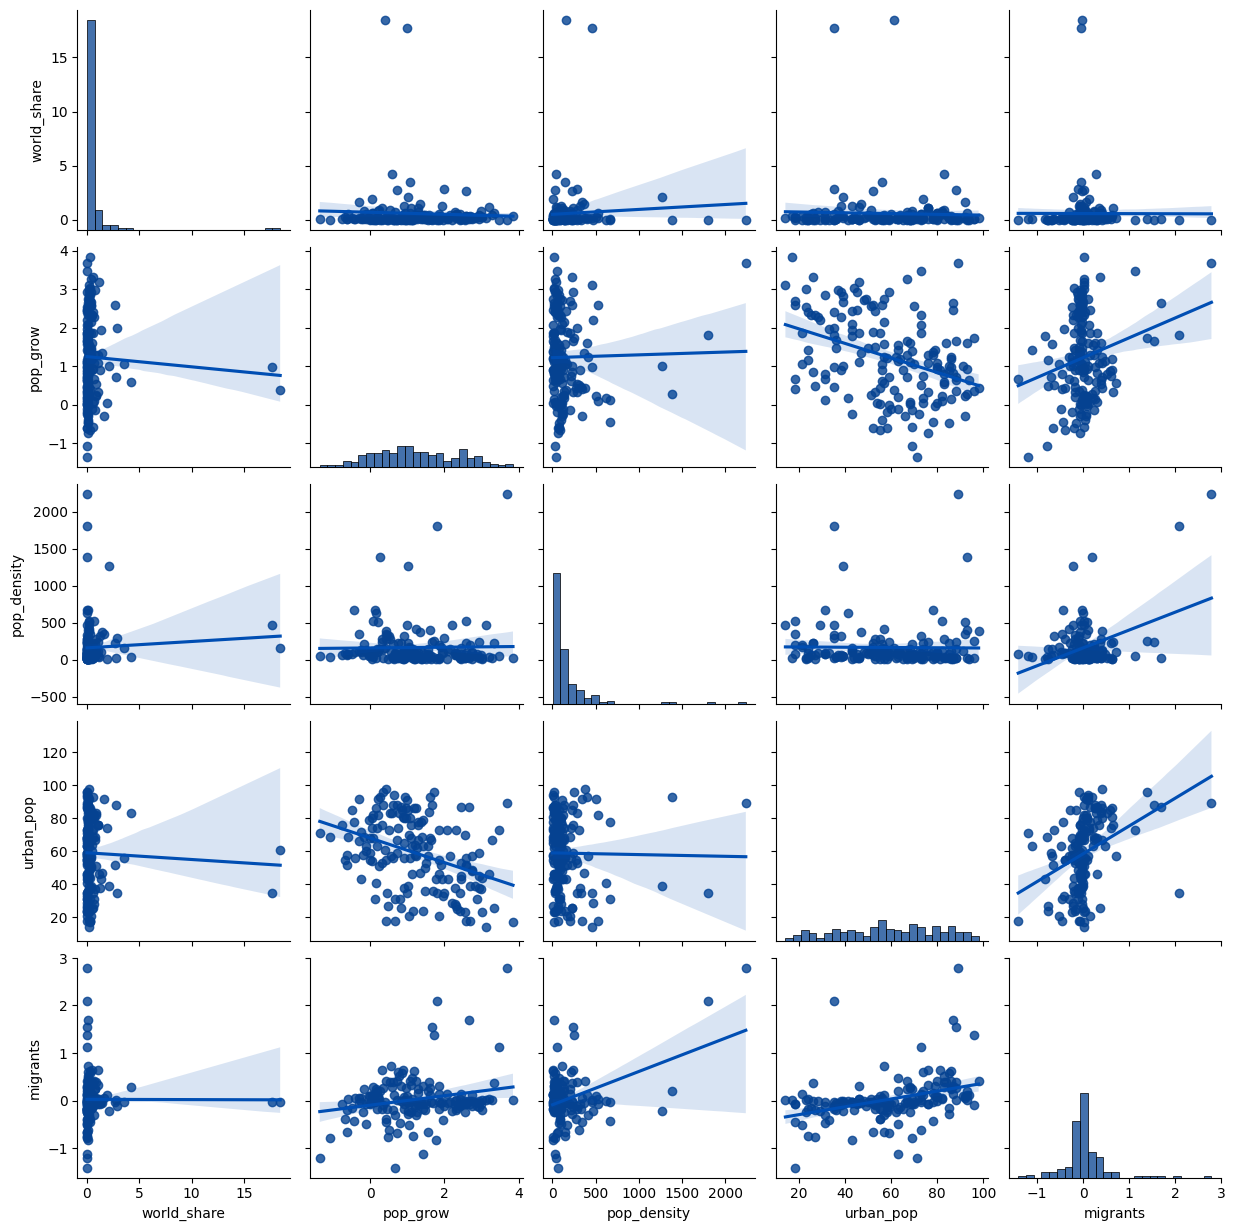

In [130]:
temp = df[['world_share', 'pop_grow', 'pop_density', 'urban_pop', 'migrants']].apply(pd.to_numeric)
blue = (0, 0.306, 0.702)
lightblue = (0.02, 0.259, 0.569, 0.51)

sns.pairplot(temp, kind='reg', plot_kws={'color': blue, 'line_kws': {
              'color': blue}, 'scatter_kws': {'color': lightblue}}, 
             diag_kws={'color': lightblue, 'bins': 25})
plt.show()

The scatter plots illustrate the relationships between various population features, revealing mostly weak or no significant correlations. World share shows weak negative trends with both population density and urban population, indicating that countries with a larger share of the world population tend to have lower population densities and urban populations, though these relationships are not strong. There is no significant relationship between world share and population growth or net migration numbers. Population growth does not exhibit clear trends with any other features, suggesting that population growth rates are independent of population density, urban population, and migration numbers. Similarly, population density shows no significant correlations with urban population or net migration numbers, indicating that population density does not strongly correlate with these features. Lastly, the urban population also shows no clear trends with net migration numbers, suggesting that the percentage of the population living in urban areas is independent of migration trends. Overall, the scatter plots highlight the complexity and independence of demographic characteristics across different countries, with most population features not showing strong correlations with each other.

Now, we will create a pairplot with all the features to see the relationships between them all at once. The previous pair plots were separated by category, so we did not see relationships between features in different categories, which will be accomplished here. Here, we also exclude GDP per capita because its very similar to income and space is already very limited. This plot will take a bit longer to run than the previous pair plots, so please be patient.

Note: You can right click on the plot and save it as an image to view it in full size.

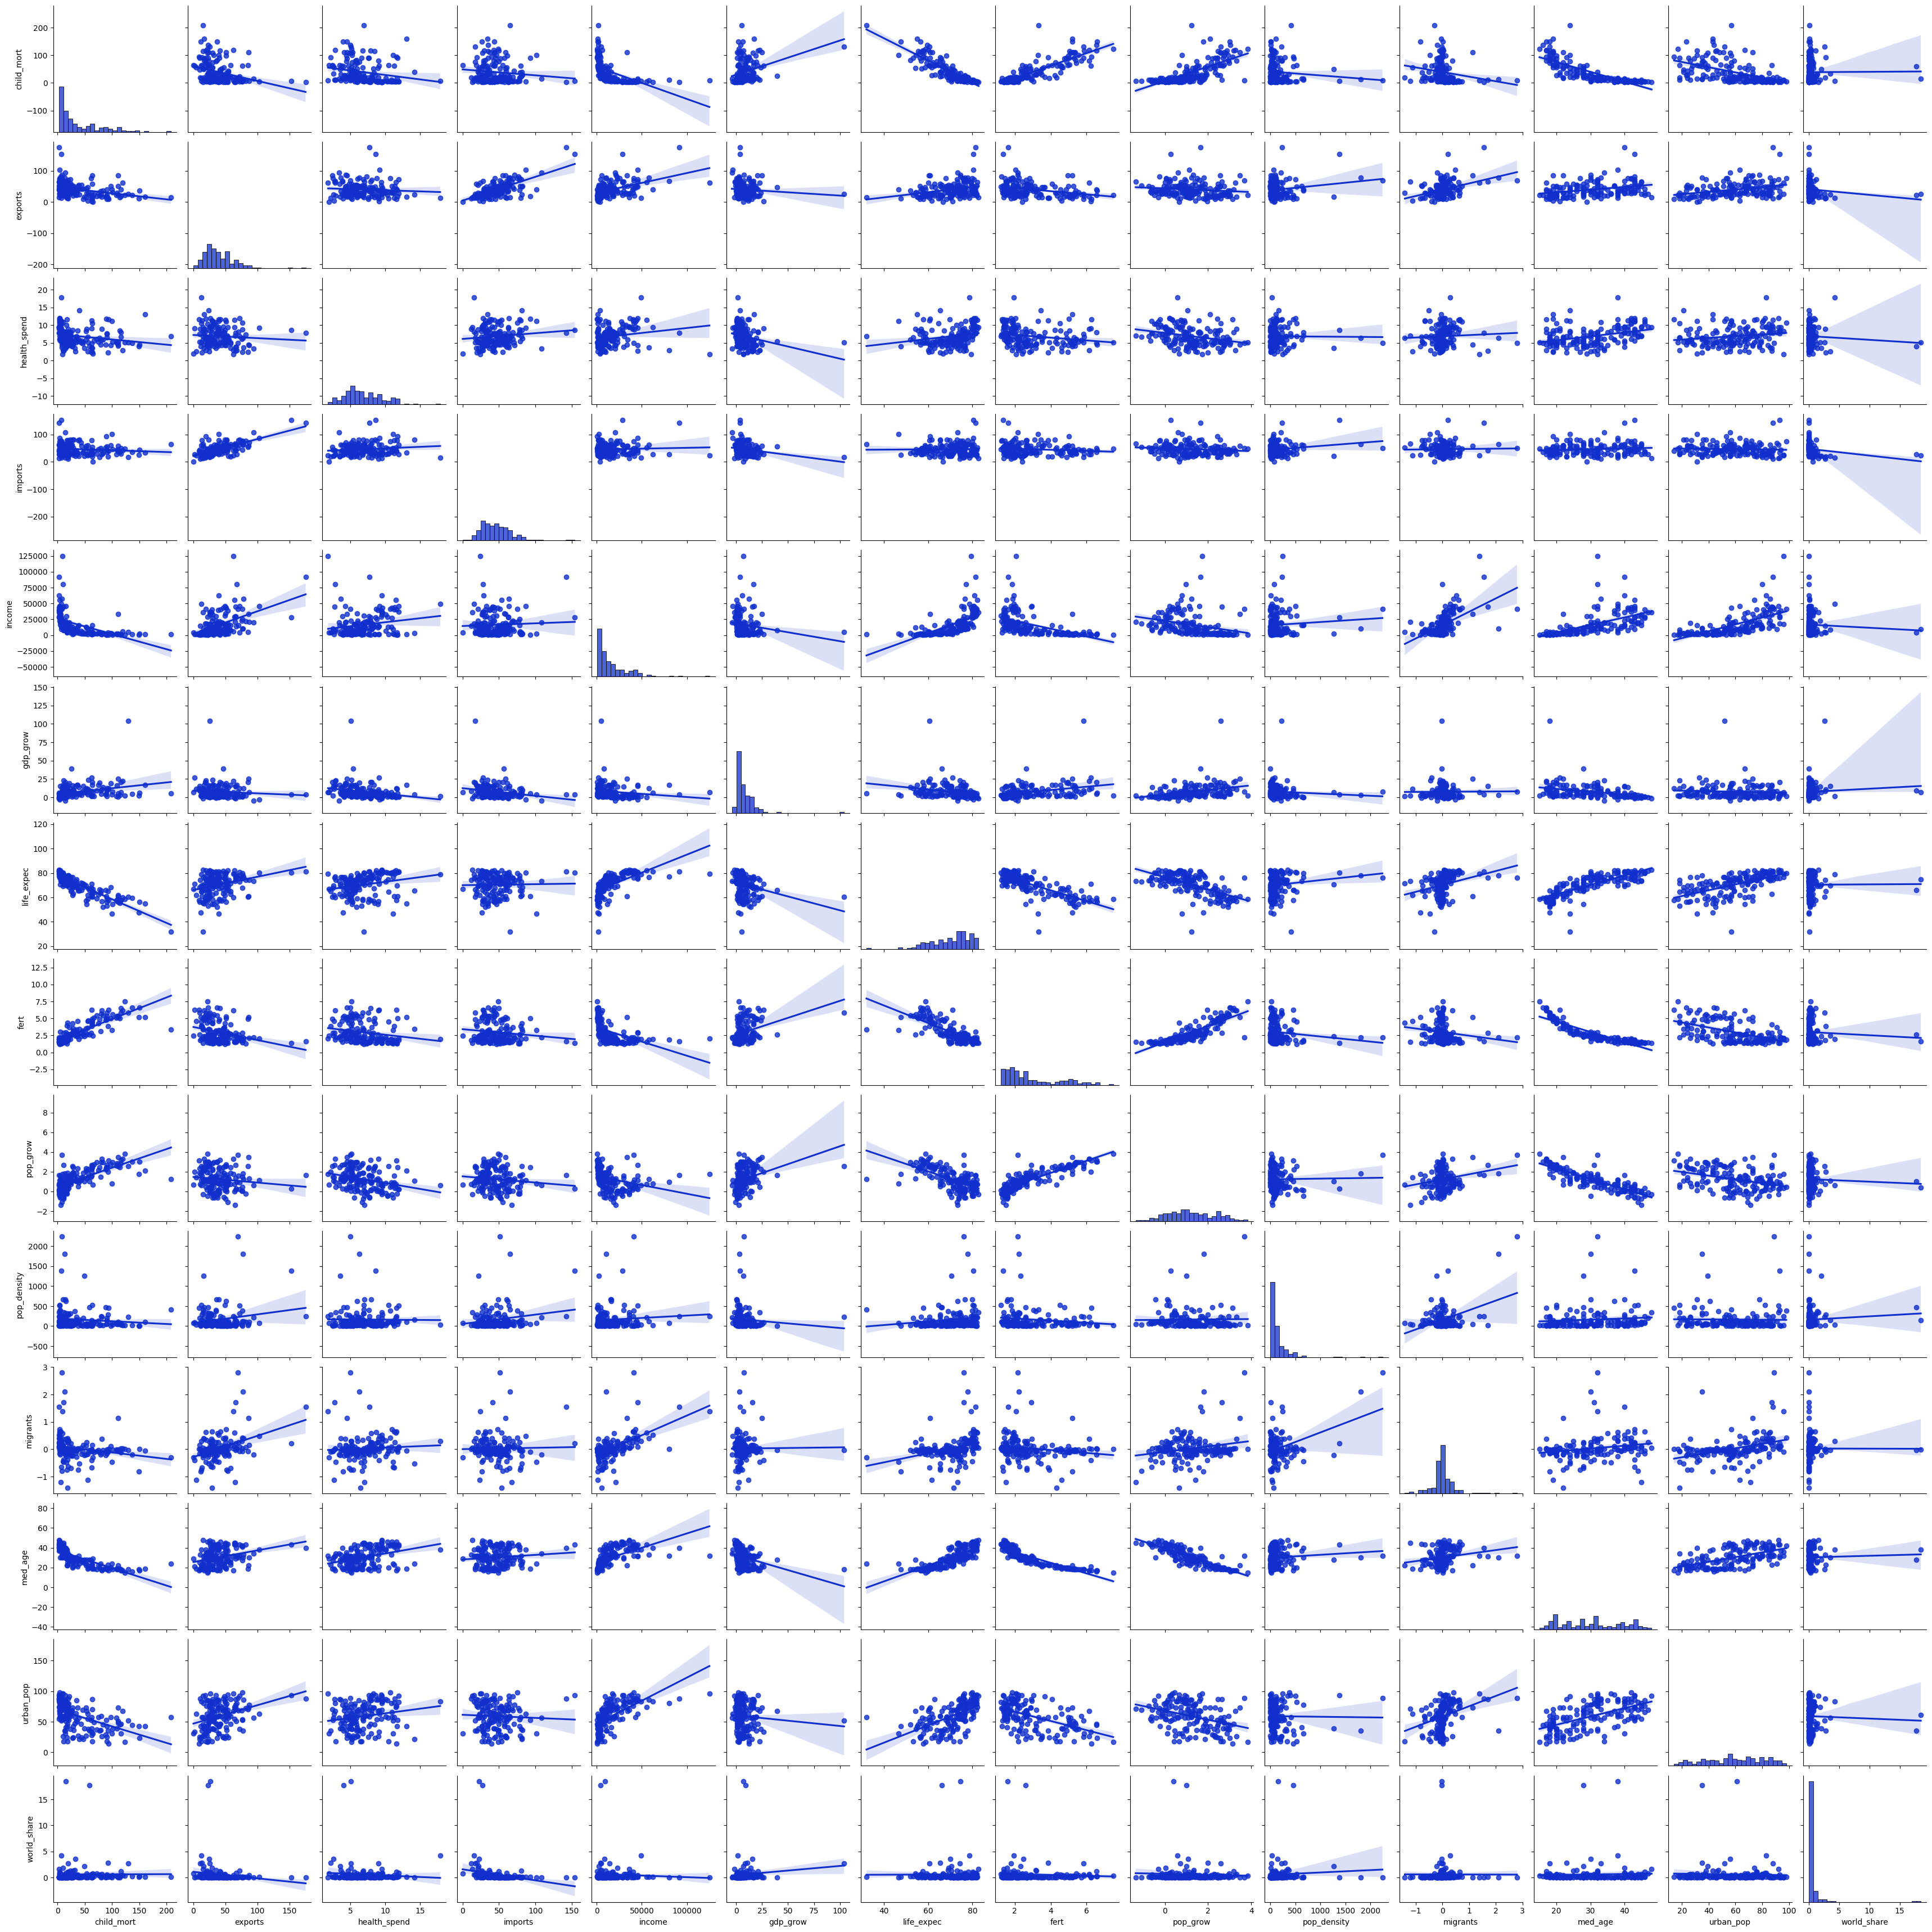

In [131]:
temp = df.drop(columns=['country', 'gdp_percapita', 'population', 'land_area']).apply(pd.to_numeric)

purple = (0.063, 0.184, 0.8)
lightpurple = (0.063, 0.184, 0.8, 0.151)

sns.pairplot(temp, kind='reg', plot_kws={'color': purple, 'line_kws': {
    'color': purple}, 'scatter_kws': {'color': lightpurple}}, 
             diag_kws={'color': lightpurple, 'bins': 25}
)

plt.show()

#### Insights

From this, we find that income is correlated with child mortality, life expectancy, and fertility, population growth is correlated with child mortality and fertility, median age is correlated with health spending, income, and population growth, and urban population is correlated with exports, income, life expectancy, and median age. Some of these make sense and some do not at first glance, but they are interesting relationships to explore further. For instance, it doesn't immediately make sense that median age increases as urban population increases, but it could be the case that urbanized countries tend to have healthier populations that live longer and a low fertility rate, so the old population prevails. On the other hand, as fertility increases, population growth does as well. When more children are born, the population increases at a higher rate, so this relationship is more obvious. Also interesting is that population density, world share, gdp growth, and migrants do not seem to have any strong relationships with other features.

### Analysis & Machine Learning

We will begin performing dimensionality reduction on the data, a form of unsupervised learning. [Unsupervised learning](https://cloud.google.com/discover/what-is-unsupervised-learning) is a type of machine learning that learns patterns in unlabeled datasets. Dimensionality reduction is the process of transforming data from a higher-dimensional vector space to a lower-dimensional one. More specifically, in our context, we seek to reduce the dimensionality of our country data to be 2 dimensions, allowing us to plot the countries as points on a 2D graph and find clusters and anomolies in the data.

To perform the dimensionality reduction, we use [PCA (Principal Component Analysis)](https://www.ibm.com/topics/principal-component-analysis), a method whereby a linear transformation between the higher-dimensional and lower-dimensional space is learned that maximizes variance explained by each of the PCA components.

Before performing PCA, we perform some feature engineering, data cleaning and augmentation. We create a new GDP feature by multiplying our GDP per capita and population features. This is important because, without this feature, our clusters and representations will not capture the size of the countries' economies. We drop the country, world share, GDP per capita, and population density columns. The country column is not useful because we want to learn a reprentation of each country's statistics and not a representation of the countries' names. World share is redundant feature because it is simply a scaled version of the population feature. GDP per capita is a very similar statistic to income, so we didn't want to include both. Lastly, population density is also redundant because it can be calculated by dividing population feature by the land area feature. We only want to include unique features in our dimensionality reduction.

We also scale our features to have a mean of 0 and a standard deviation of 1 before performing PCA. This is important because PCA requires 0-mean centering, and without standardization, PCA will prioritize the features with higher variance. We want each feature to be given equal importance.

Because PCA is a linear dimensionality reduction technique, it can only find linear relationships between our features. However, some of our features may have other types of relationships, such as logistic ones. To address this limitation, we performed a logistic transformation on some of our features to allow for PCA to learn logistic relationships. To decide which features to transform, we performed PCA with and without the transformations and looked at the variance explained by the PCA analysis. The features which yielded higher variance explained when logistically transformed were the ones we selected for transformation.

Next, we create a scatter plot of the newly projected points in 2D space, labeling them with their country names and color-coding them by their continent.

We can see that are clusters of similar countries forming. On the right side of the plot, we see there is a greater concentration of Western-style democracies. Many of the countries in this area are also located in Europe, indicated by their red color. On the left side, we can see there is a concentration of less-developed countries in yellow and orange, signifying that they are located in Africa and Asia. This simple 2D plot allows us to see which countries are similar to one another in regards to their economic, health, and population statistics by looking at the distance between their points.

We then repeat this process of performing PCA and plotting the new points, except now we only run PCA on a subset of features. The first subset is health, containing the child mortality, health spending, life expectancy, median age, and fertility features. The second is economic, containing GDP, imports as a percent of GDP, exports as a percent of GDP, income, and GDP growth rate. The third and last is the population subset, containing population, population growth rate, urban population, migrants, fertility rate, and median age.

The variance explained by the PCA analyses for all, health, economic, and population features are 63%, 92%, 73%, and 75% respectively.

Variance explained: 63.21882110565977%


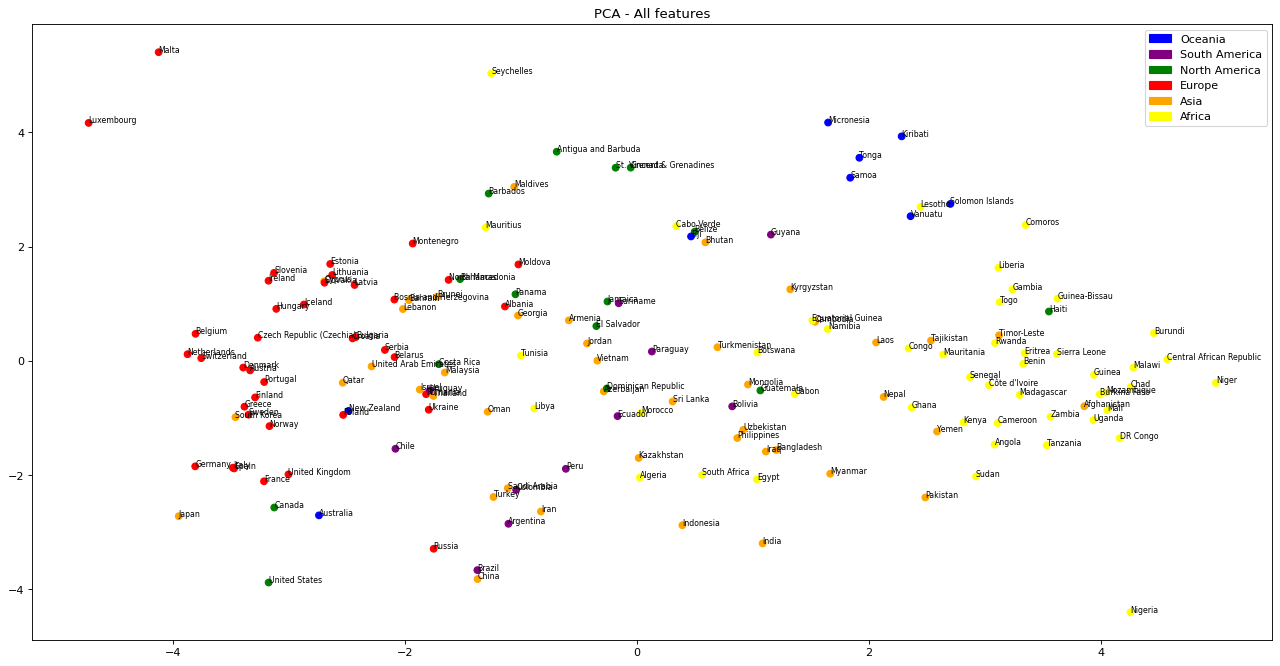

Variance explained: 92.07966079672393%


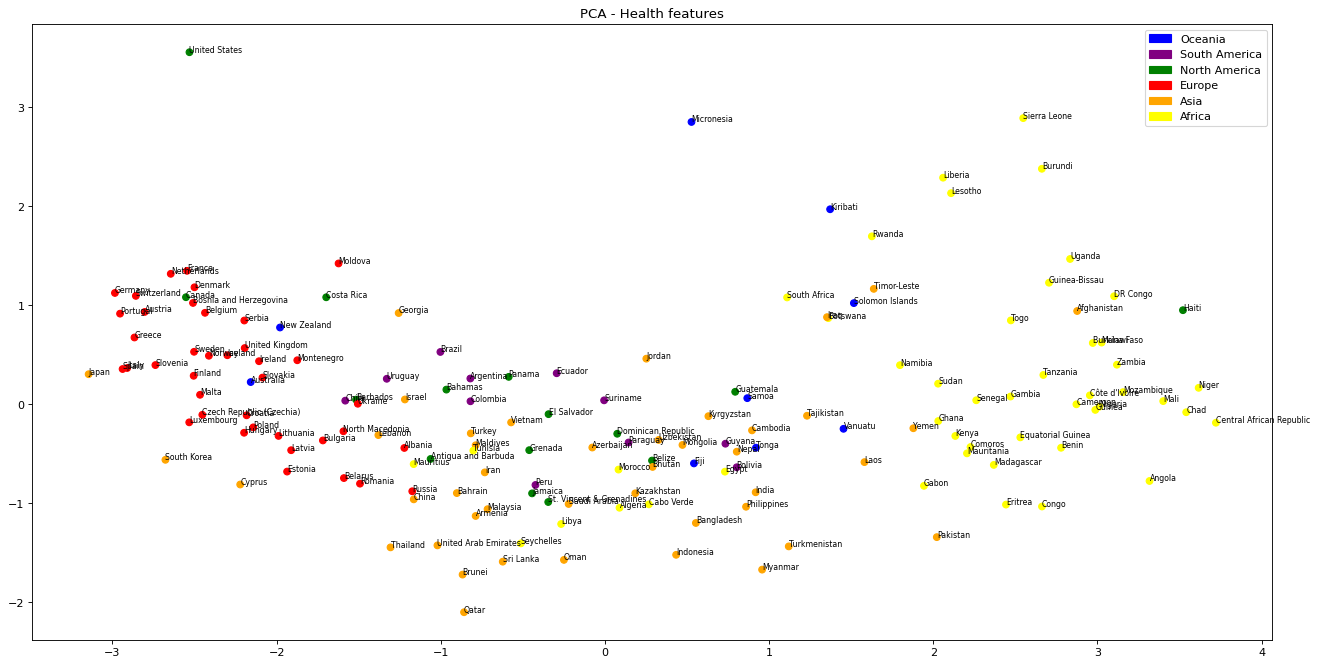

Variance explained: 72.80403870773425%


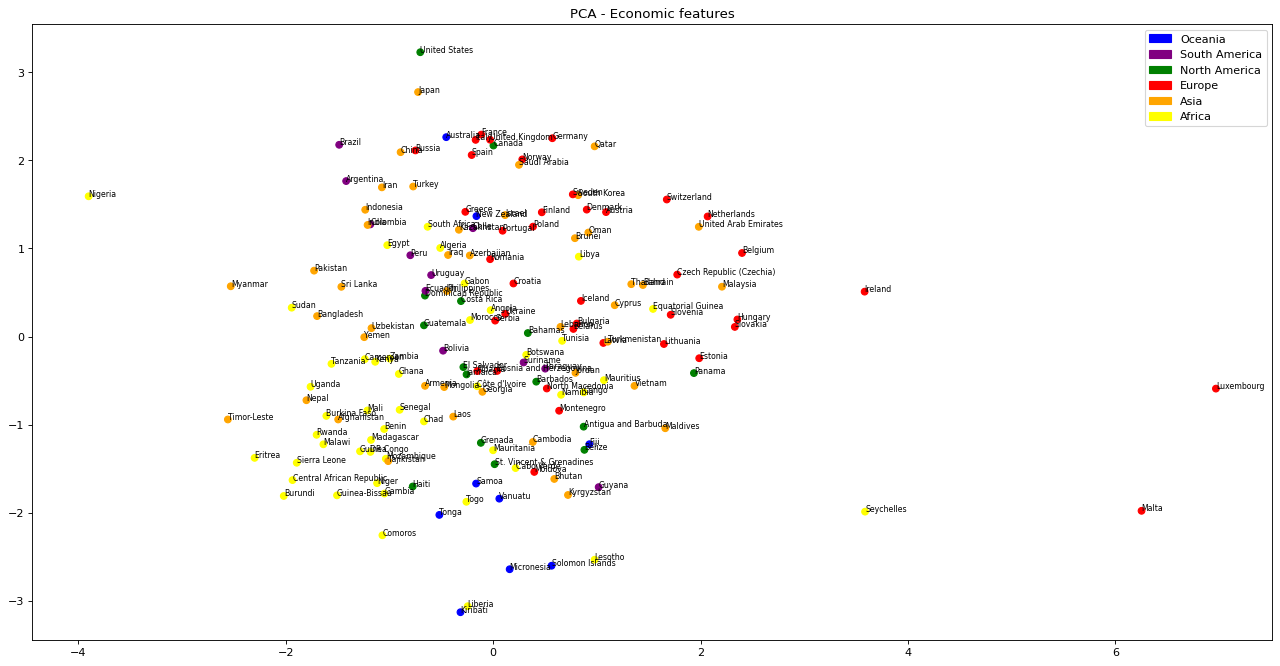

Variance explained: 75.29802835880719%


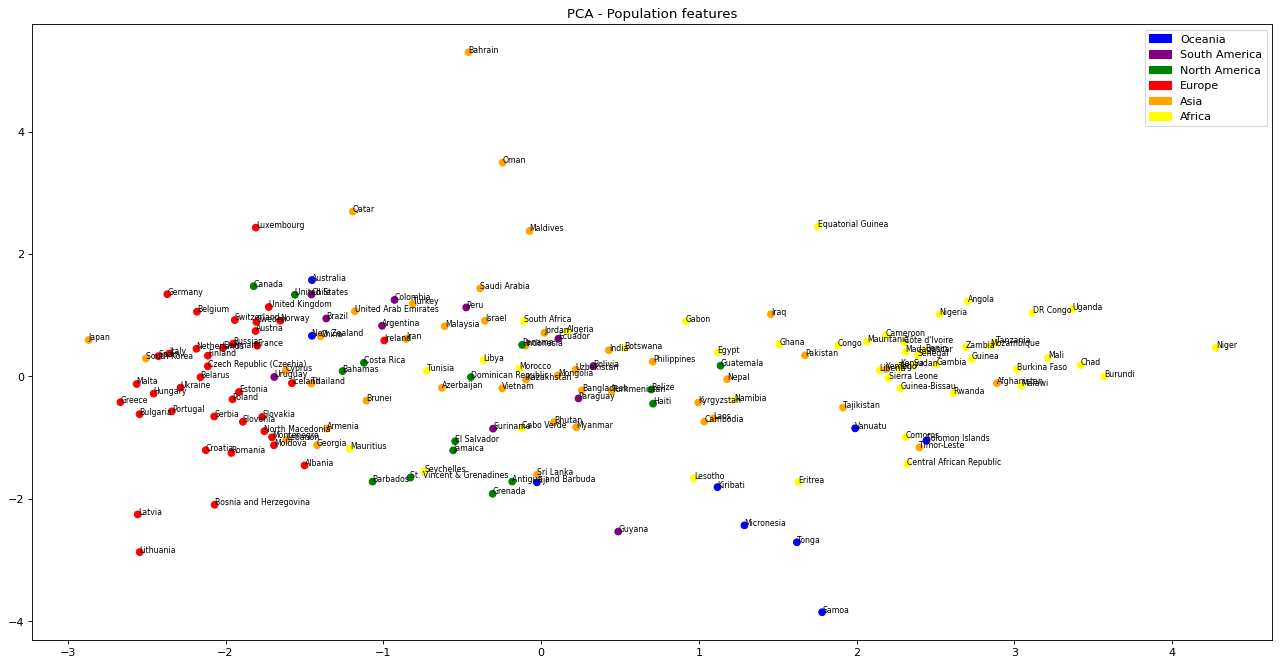

In [132]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
from matplotlib.patches import Patch
import numpy as np

scaler = StandardScaler()

df['gdp'] = df['gdp_percapita'] * df['population']
copy = df.drop(columns=['country', 'world_share', 'gdp_percapita', 'pop_density'], inplace=False)

for x in ['population', 'income', 'fert', 'child_mort', 'land_area', 'med_age', 'gdp']:
  copy[x] = np.log(copy[x].astype(float))

africa = ["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde", "Cameroon", "Central African Republic", "Chad", "Comoros", "DR Congo", "Congo", "Côte d'Ivoire", "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini (Swaziland)", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"]

asia = ["Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei", "Cambodia", "China", "Cyprus", "Georgia", "India", "Indonesia", "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal", "Oman", "Pakistan", "Philippines", "Qatar", "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka", "Syria", "Tajikistan", "Thailand", "Timor-Leste", "Turkey", "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"]

europe = ["Albania", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Czech Republic (Czechia)", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Moldova", "Montenegro", "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russia", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom"]

north_america = ["Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", "Costa Rica", "Cuba", "Dominica", "Dominican Republic", "El Salvador", "Grenada", "Guatemala", "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama", "St. Kitts and Nevis", "St. Lucia", "St. Vincent & Grenadines", "Trinidad and Tobago", "United States"]

south_america = ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"]

oceania = ["Australia", "Fiji", "Kiribati", "Micronesia", "New Zealand", "Palau", "Papua New Guinea", "Samoa", "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu"]

colors = list(map(lambda x:
                  'blue' if x in oceania else
                  'purple' if x in south_america else
                  'green' if x in north_america else
                  'red' if x in europe else
                  'orange' if x in asia else
                  'yellow' if x in africa else
                  'black', df['country']))

patches = [Patch(color='blue', label='Oceania'),
           Patch(color='purple', label='South America'),
           Patch(color='green', label='North America'),
           Patch(color='red', label='Europe'),
           Patch(color='orange', label='Asia'),
           Patch(color='yellow', label='Africa')]

titles = ['PCA - All features', 'PCA - Health features', 
          'PCA - Economic features', 'PCA - Population features']

pca = PCA(2)

for columns in [copy.columns,
                ['child_mort', 'health_spend', 'life_expec', 'med_age', 'fert'],
                ['gdp', 'imports', 'exports', 'income', 'gdp_grow'],
                ['population', 'pop_grow', 'urban_pop', 'migrants', 'fert', 'med_age']]:
  scaled_data = scaler.fit_transform(copy[columns])
  data_pca = pca.fit_transform(scaled_data)
  print("Variance explained: {}%".format(pca.explained_variance_ratio_.cumsum()[-1] * 100))

  figure(figsize=(20, 10), dpi=80)
  plt.scatter(data_pca[:, 0], data_pca[:, 1], c=colors, label=df['country'])
  for i, x in enumerate(df['country']):
    plt.annotate(x, (data_pca[i][0], data_pca[i][1]), fontsize=7)

  plt.legend(handles=patches)
  plt.title(titles.pop(0))
  
  plt.show()

In each plot, there is noticable clustering among countries of the same continent, supporting our hypothesis that a country's continent/geographical location is related to its health, economic, and population conditions. Interestingly, in all the plots, the points of the countries in Africa and Europe are the furthest apart and form relatively tight clusters, with the countries from the remaining continents inbetween them. This suggests that, under a global context, the economic, social, and population conditions of European and African countries are the most extreme, while countries from other continents, such as Asia, are generally in the middle in terms of how their conditions relate to other countries in these categories of health, economics, and population.

### Insights & Conclusion

From our analyses, we can conclude that geographic location plays a key role in many countries' health, economic development, and population structures and demographics. Countries on the same continent share similar characteristics along these 3 core categories. And among all the categories we examined, Europe and Africa also almost the most divided of any two continents, with other continents primarily residing inbetween them. Furthermore, there is high correlation between the features we examined, with our 2 component PCA analysis able to explain 63% of the variance between the 15 statistics. This provides strong evidence that the economic, health, and population conditions of a country are highly interrelated.

There are some outlier countries in these PCA findings, which stray from their continents and the whole group of countries. For instance, Luxembourg and Malta for the economic features, and the US for health features. It would be interesting to explore this further, which may be done in a future analysis.